
# **Trabajo Práctico N°1 - Regresión**
---
## ***Aprendizaje Automático 1 - TUIA***

| Integrantes | Legajo|
| ----- | --- |
|Casado, Pedro | C-7439/1 |
|Rizzotto, Camila| R-4676/1 |

#Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'dark', palette='Spectral')

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#Análisis Descriptivo

##Descarga y descripción del dataset

In [2]:
house_prices = pd.read_csv('house-prices-tp.csv')

In [ ]:
house_prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


In [ ]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


Vemos que nuestro dataset es de 14 columnas x 556 filas, con la totalidad de variables siendo de tipo real (float64). Diccionario de variables:

In [3]:
variables = pd.DataFrame([('CRIM','tasa de criminalidad per cápita por ciudad','float'),
 ('ZN','proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados','float'),
 ('INDUS','proporción de acres de negocios no minoristas por ciudad','float'),
 ('CHAS','variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)','float'),
 ('NOX','concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]','float'),
 ('RM','número promedio de habitaciones por vivienda','float'),
 ('AGE','proporción de unidades ocupadas por sus propietarios construidas antes de 1940','float'),
 ('DIS','distancias ponderadas a cinco centros de empleo de Boston','float'),
 ('RAD','índice de accesibilidad a las autopistas radiales','float'),
 ('TAX','tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]','float'),
 ('PTRATIO','proporción alumno-maestro por ciudad','float'),
 ('B','El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad','float'),
 ('LSTAT','% de población de menor estatus socioeconómico','float'),
 ('MEDV','valor medio de las viviendas ocupadas por sus propietarios en miles de dólares [k$]','float')],columns=('Variable','Descripción','Tipo_de_dato'))
variables

,Variable,Descripción,Tipo_de_dato
0,CRIM,tasa de criminalidad per cápita por ciudad,float
1,ZN,proporción de terrenos residenciales zonificad...,float
2,INDUS,proporción de acres de negocios no minoristas ...,float
3,CHAS,variable dummy del río Charles (1 si el tramo ...,float
4,NOX,concentración de óxidos de nitrógeno (partes p...,float
5,RM,número promedio de habitaciones por vivienda,float
6,AGE,proporción de unidades ocupadas por sus propie...,float
7,DIS,distancias ponderadas a cinco centros de emple...,float
8,RAD,índice de accesibilidad a las autopistas radiales,float
9,TAX,tasa de impuesto sobre la propiedad a valor co...,float


In [ ]:
print(house_prices.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  533.000000  534.000000  541.000000  533.000000  532.000000  535.000000   
mean     5.845517   13.197175   11.218725    0.090056    0.560050    6.291839   
std     13.828631   24.902981    6.942021    0.286531    0.119472    0.782403   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.084470    0.000000    5.130000    0.000000    0.453000    5.875500   
50%      0.315330    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      4.871410   20.000000   18.100000    0.000000    0.643986    6.638500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  532.000000  541.000000  528.000000  538.000000  528.000000  534.000000   
mean    67.632303    3.944102    9.699379  409.575089   18.429904  347.806040   
std     28.461925    2.2556

##Análisis de datos faltantes y valores atípicos

In [ ]:
#Observamos la cantidad de nulos que tiene cada variable
print(house_prices.isnull().sum())

CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64


In [9]:
#Como MEDV es la target, decidimos empezar borrando del dataset todas las filas que tengan allí valores NaN
house_prices = house_prices.dropna(subset=['MEDV'])

In [ ]:
#Vemos como nos quedó la estructura del dataset
house_prices.shape

(535, 14)

In [ ]:
print(house_prices.isnull().sum())

CRIM       11
ZN         11
INDUS       4
CHAS        9
NOX         9
RM          7
AGE        11
DIS         5
RAD        12
TAX         9
PTRATIO     9
B           9
LSTAT       9
MEDV        0
dtype: int64


In [ ]:
##Vamos a indagar sobre las filas que tengan algun valor faltante
filas_con_NaN = house_prices[house_prices.isnull().any(axis=1)]
filas_con_NaN

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
14,30.986519,60.711549,8.827191,0.0,0.747569,NaN,23.593405,5.062472,10.554892,621.330711,16.634925,60.162028,30.494822,23.675363
23,73.605747,90.434661,12.740286,0.0,NaN,8.050076,22.542424,5.731208,NaN,NaN,21.291610,NaN,NaN,28.130115
66,NaN,57.349461,3.047775,1.0,0.813896,4.371469,42.005096,NaN,14.638330,260.006282,16.867106,95.291811,NaN,30.089086
88,NaN,51.406681,NaN,NaN,NaN,NaN,8.022743,NaN,17.000150,NaN,18.346036,NaN,NaN,35.865002
128,NaN,NaN,13.613966,1.0,0.655441,6.934419,26.190734,10.590040,6.850123,433.579295,12.721609,81.889481,NaN,12.937564
158,NaN,16.026020,NaN,0.0,0.815798,7.680745,16.376653,10.772406,22.069511,NaN,NaN,99.928197,NaN,49.000536
172,48.331901,12.306287,25.400223,1.0,0.761800,NaN,77.547987,10.348195,NaN,NaN,15.579107,219.044542,29.736604,14.442316
203,2.087555,NaN,3.773124,NaN,NaN,NaN,72.487706,1.895738,NaN,592.638217,15.346810,NaN,36.220301,45.282756
223,NaN,NaN,15.523638,NaN,NaN,NaN,35.540367,1.967787,1.307128,NaN,13.364849,200.625160,NaN,40.694707
230,23.785283,67.378344,21.006485,0.0,0.859067,8.421051,70.780098,5.816282,17.164570,NaN,20.183706,370.991397,9.332422,24.241712


In [ ]:
filas_con_NaN.shape

(29, 14)

Hay 29 filas con algún valor NaN. Si las borrásemos, estaríamos sacando el 5,42% de filas del dataset (29/535*100). Es un porcentaje bajo, pero preferimos borrar menos del 5% de los datos. Observamos que algunas filas, como la 88 o la 504, tienen valores faltantes en muchas de las variables, por lo menos en más de 3.

In [ ]:
#Contamos la cantidad de filas que tienen X cantidad de valores NaN
filas_x_NaN = filas_con_NaN.isnull().sum(axis=1).value_counts().rename_axis('Cantidad de NaN').rename('Cantidad de filas').sort_index()
filas_x_NaN

,Cantidad de filas
Cantidad de NaN,
1,5
2,3
3,9
4,2
5,2
6,1
7,4
8,2
9,1


In [ ]:
filas_x_NaN[2:].sum()

21

Vemos que de hecho hay 21 filas con 3 valores faltantes o más. Nos parece que tener 3 variables sin datos en algunos registros es significativo y por lo tanto nos parece bien borrarlas, al considerar además que hacerlo nos significaría perder solo el 3,93% de registros dataset, una proporción que ahora sí es aceptable para nosotros. Decidimos imputar el resto de los valores NaN que nos quedan

In [10]:
house_prices = house_prices.dropna(thresh=len(house_prices.columns)-3)

###Split del dataset

En esta instancia es donde decidimos hacer el split: antes de imputar los datos.

In [11]:
#Vamos a separar entre la matriz de features (variables explicativas) y el vector target
X = house_prices.drop('MEDV', axis=1)
y = house_prices['MEDV'].values.reshape(-1,1)
#Realizamos split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((418, 13), (105, 13), (418, 1), (105, 1))

###Imputación

In [12]:
#Imputamos de valores faltantes: usamos el algoritmo de prediccón avanzada KNN imputer
knn_imputer = KNNImputer()
X_train_knnImputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_knnImputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

##Escalado de datos

In [13]:
#Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_knnImputed), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_knnImputed), columns=X_test.columns)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((418, 13), (105, 13), (418, 1), (105, 1))

##Visualizaciones del dataset

In [94]:
# Convertimos y_train a un DataFrame para poder combinarlo con X_train_scaled temporalmente para realizar visualizaciones gráficas
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])

# Reconstruir el DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)

# Concatenamos X_train_scaled con y_train_df
train_combined = pd.concat([X_train_scaled_df, y_train_df], axis=1)

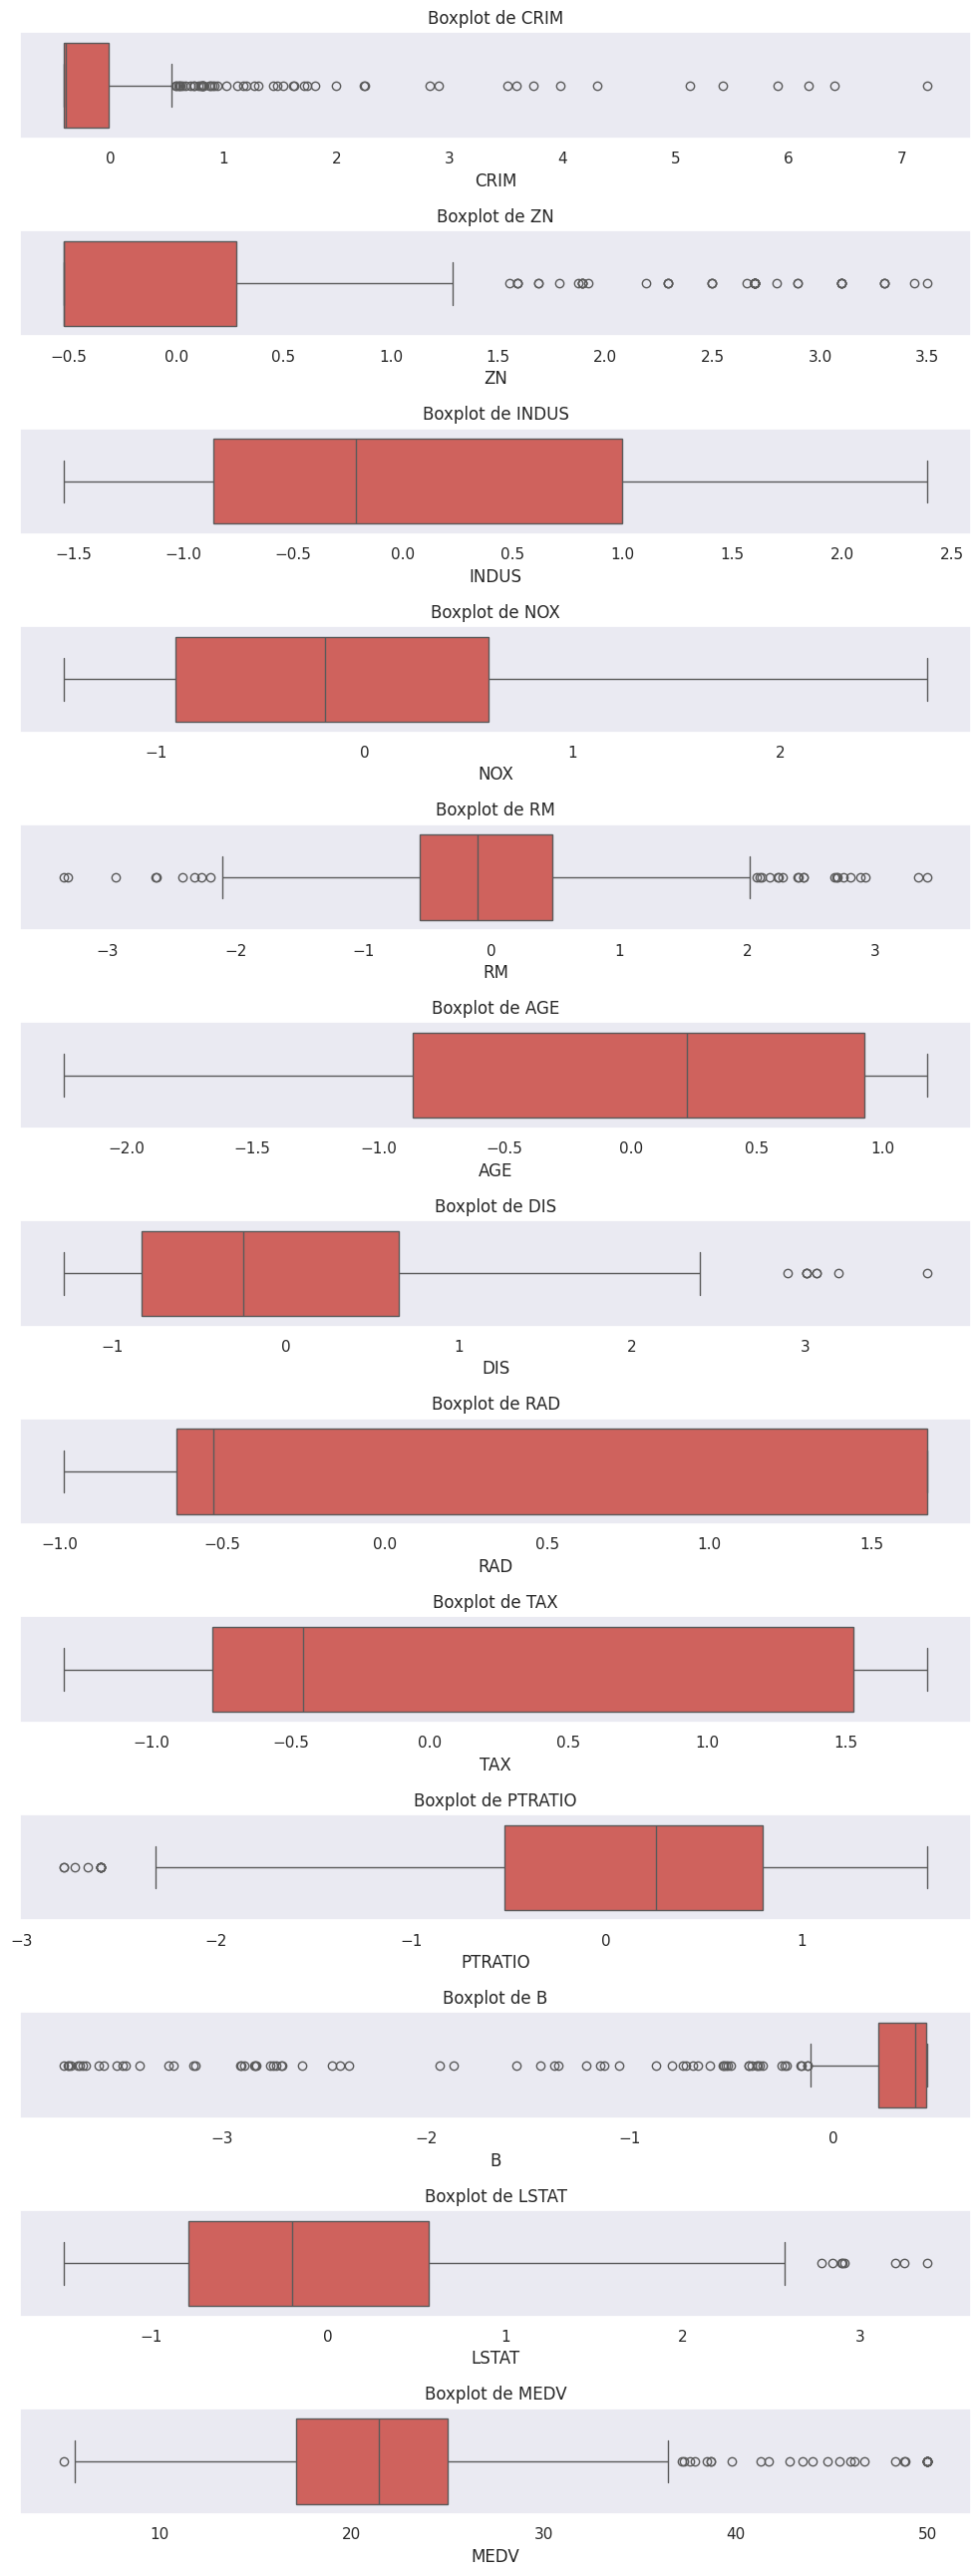

In [95]:
#Número de columnas en el DataFrame de X_train
num_cols = len(train_combined.columns)-1 #el -1 es porque ploteamos una columna menos: chas es una dummy y no nos interesa ver su boxplot

#Subplots individuales para cada columna
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 2 * num_cols))  # Ajustar el tamaño

#Boxplot por cada columna
for i, col in enumerate([c for c in train_combined.columns if c != 'CHAS']):
    sns.boxplot(data=train_combined, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()  #Ajusta espaciado entre subplots
plt.show()

Observamos que las variables B, LSTAT, PTRATIO, DIS, RM, CRIM y ZM, MEDV tienen valores atípicos. Vamos a visualizarlos de otra forma: ploteamos un pairplot.

In [ ]:
columnas = [col for col in house_prices.columns if ((col != 'CHAS') & (col != 'MEDV'))]

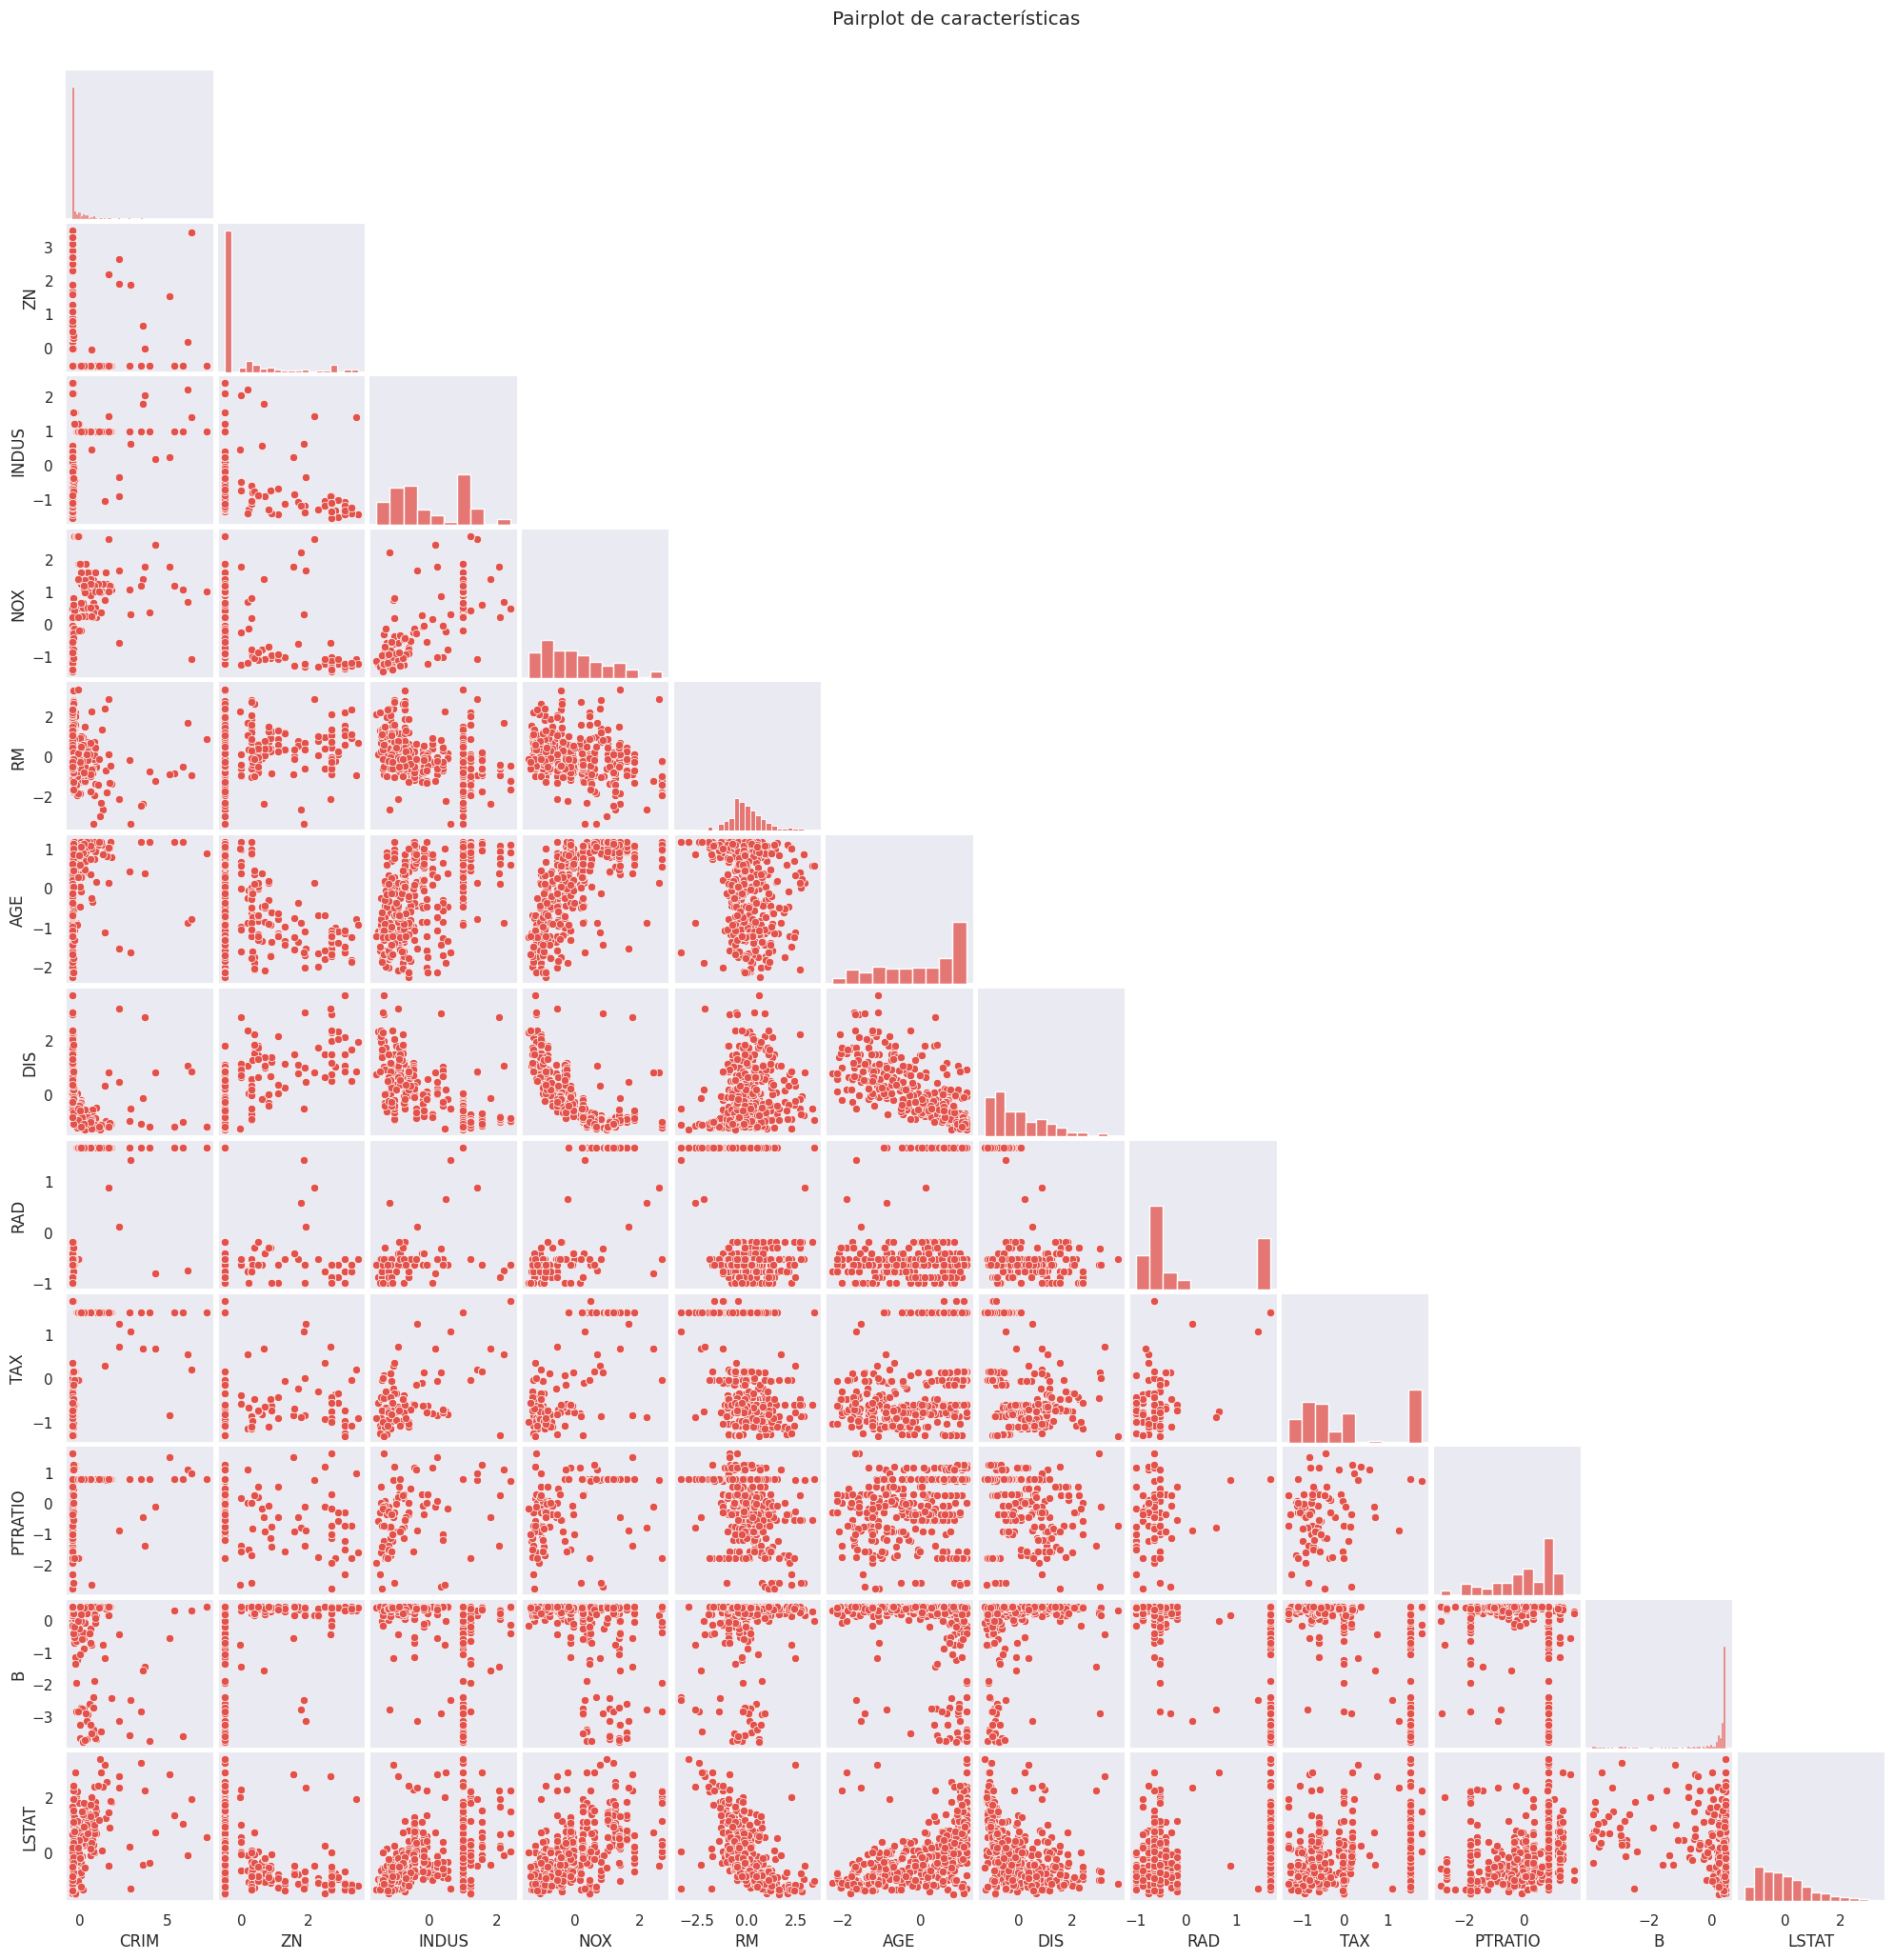

In [ ]:
sns.pairplot(data = X_train_scaled[columnas], corner = True, height = 3)
plt.suptitle('Pairplot de características', y=1.02)
plt.show()

Como vamos a realizar regularizaciones, no nos parece necesario tratar los valores atípicos de este dataset

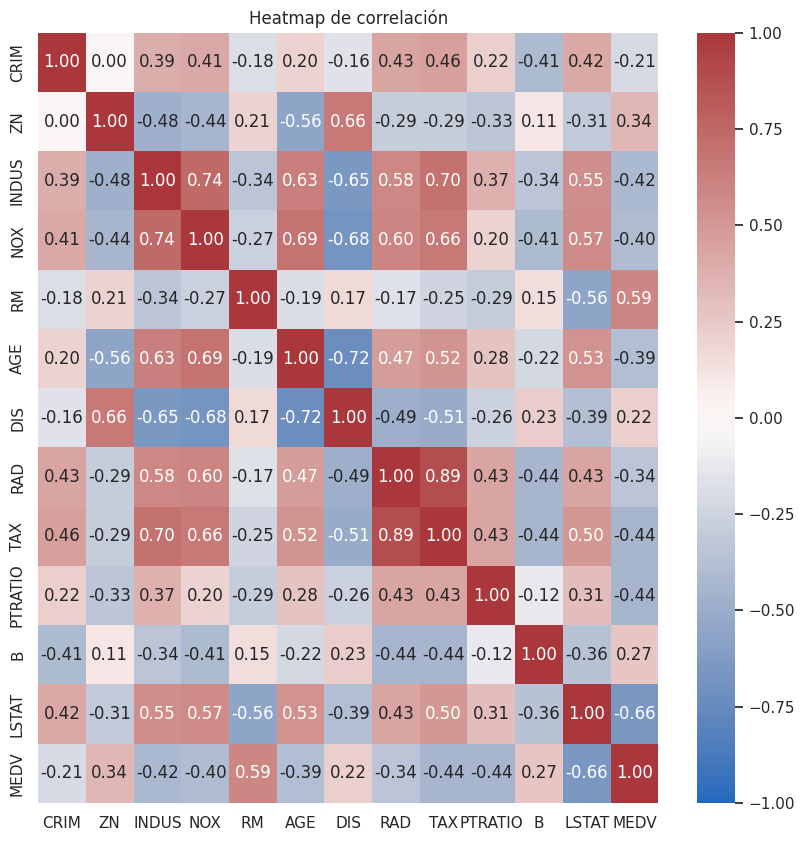

In [98]:
#Matriz de correlación de train_combined sin la columna 'CHAS'
corr = train_combined.drop('CHAS', axis=1).corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="vlag", fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap de correlación')
plt.show()

Según este gráfico, las variables fuertemente asociadas de forma lineal parecen ser 3:  
- DIS y AGE  
- INDUS y TAX  
- RAD y TAX  

Además, las características con las que la target tiene una mayor relación lineal serían RM y LSTAT

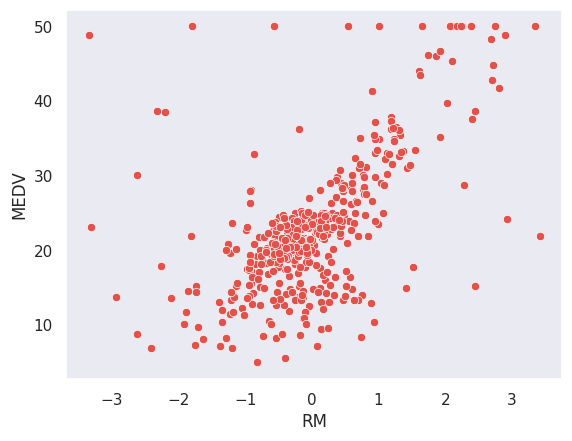

In [100]:
sns.scatterplot(x='RM', y='MEDV', data=train_combined)
plt.show()

<Axes: xlabel='LSTAT', ylabel='MEDV'>

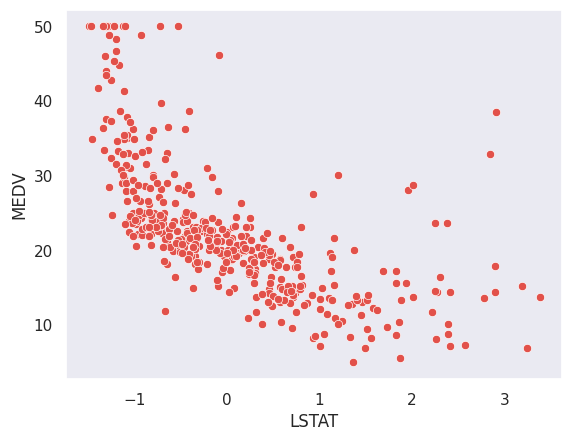

In [101]:
sns.scatterplot(x='LSTAT', y='MEDV', data=train_combined)

# Regresión Lineal

In [62]:
LinearRModel = LinearRegression()
LinearRModel.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
#Medimos ajuste en el conjunto de entrenamiento
rmse_linear_train = mean_squared_error(y_train, LinearRModel.predict(X_train_scaled), squared = False)
r2_linear_train = r2_score(y_train, LinearRModel.predict(X_train_scaled))
print(f'RMSE: {round(rmse_linear_train,2)}')
print(f'R² Score: {round(r2_linear_train),2}')

RMSE: 5.35
R² Score: (1, 2)


In [65]:
#Medimos ajuste en el conjunto de testeo. Uso rmse para mantener la misma escala que la variable a predecir y R2
y_predict_linear = LinearRModel.predict(X_test_scaled)
rmse_linear_test = mean_squared_error(y_test, y_predict_linear, squared = False)
r2_linear_test = r2_score(y_test, y_predict_linear)
print(f"RMSE: {round(rmse_linear_test,2)}")
print(f"R² Score: {round(r2_linear_test,2)}")

RMSE: 5.89
R² Score: 0.64


In [ ]:
#Resultados de la regresión lineal
LinearRModel.coef_, LinearRModel.intercept_

(array([[ 0.78610521,  1.67961526,  0.48738562,  1.95131922, -1.71665163,
          2.51510726, -0.84639333, -3.14145484,  1.70641094, -2.5544604 ,
         -1.67144153,  0.57148953, -3.38509664]]),
 array([22.72472573]))

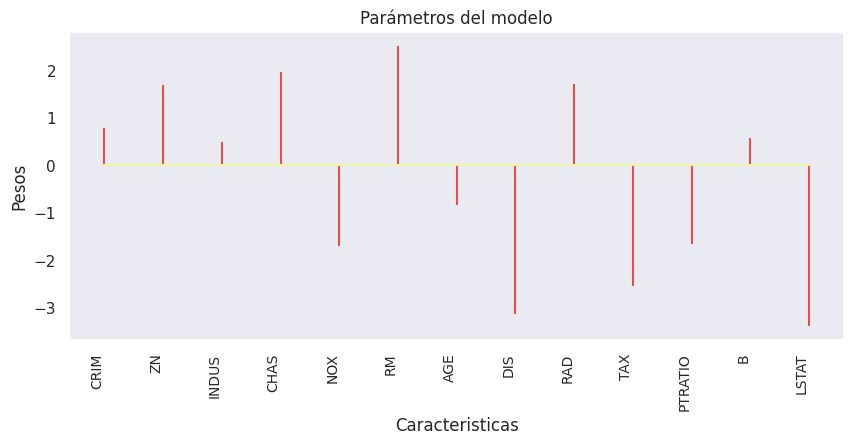

In [ ]:
# Coeficientes del modelo
LinearRModel_coef = pd.DataFrame({'predictor': X_train_scaled.columns, 'coef': LinearRModel.coef_.flatten()})
# flatten() convierte el array de coeficientes en una versión unidimensional, independientemente de cuántas dimensiones tenga originalmente.
fig, ax = plt.subplots(figsize=(10, 4))
ax.stem(LinearRModel_coef.predictor, LinearRModel_coef.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Caracteristicas')
ax.set_ylabel('Pesos')
ax.set_title('Parámetros del modelo')
plt.show()

#Regresiones con Gradiente

In [82]:
#Separamos el conjunto de datos para poder hacer una optimizacion de hiperparametros.
X_train_grad, X_val_grad, y_train_grad, y_val_grad = train_test_split(X_train_scaled, y_train, test_size=0.125, random_state=42)

##Gradiente Descendiente

In [81]:
def gradient_descent(X_train, y_train, X_val, y_val, graph = False, lr=0.01, epochs=200):
    n = X_train.shape[0]
    m = X_train.shape[1]
    o = X_val.shape[0]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))
    np.random.seed(43)  # Esto hace que los resultados sean reproducibles
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

      # Graficar errores de entrenamiento y prueba si se indica en el parametro graph
    if graph == True:
      # Definir una figura
      plt.figure(figsize=(12, 6))
      # Plotear errores de entrenamiento
      plt.plot(train_errors, label='Error de entrenamiento')
      # Plotear errores de prueba
      plt.plot(test_errors, label='Error de validación')
      # Poner labels en los ejes
      plt.xlabel('Época')
      plt.ylabel('Error cuadrático medio')
      # Activar la leyenda
      plt.legend()
      # Poner titulo
      plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
      # Terminar y mostrar gráfico
      plt.show()
    return W, train_errors, test_errors

In [83]:
#Para conseguir el mejor modelo vamos a utilizar diferentes valores de lr y con nuestros datos de validación elegimos el más conveniente
learning_rates = np.logspace(-2, 0, 200)
tests_mse = [] # Para almacenar el MSE de cada modelo
for lr in learning_rates:
  W,train_errors,test_errors = gradient_descent(X_train_grad, y_train_grad,X_val_grad,y_val_grad, False, lr, epochs=200)
  tests_mse.append(test_errors.pop()) # Nos quedamos con el ultimo ya que es cuando nuestro modelo converge (Si el modelo no converge de todas formas no seria una buena opción)

# Se aplica la raíz cuadrada para pasar de mse a rmse
tests_rmse = np.sqrt(tests_mse)
# Se identifica el mejor
rmse_min  = np.min(tests_rmse)
lr_optimo = round(learning_rates[np.argmin(tests_rmse)],2)
print(f'El mejor valor de RMSE es: {round(rmse_min,2)}, se consiguió con un lr de: {lr_optimo}')

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-81-a7055a0117ef>:17: RuntimeWarning: overflow encountered in square
  train_mse = np.mean(error_train ** 2)
<ipython-input-81-a7055a0117ef>:23: RuntimeWarning: overflow encountered in square
  test_mse = np.mean(error_test ** 2)


El mejor valor de RMSE es: 4.92, se consiguió con un lr de: 0.02


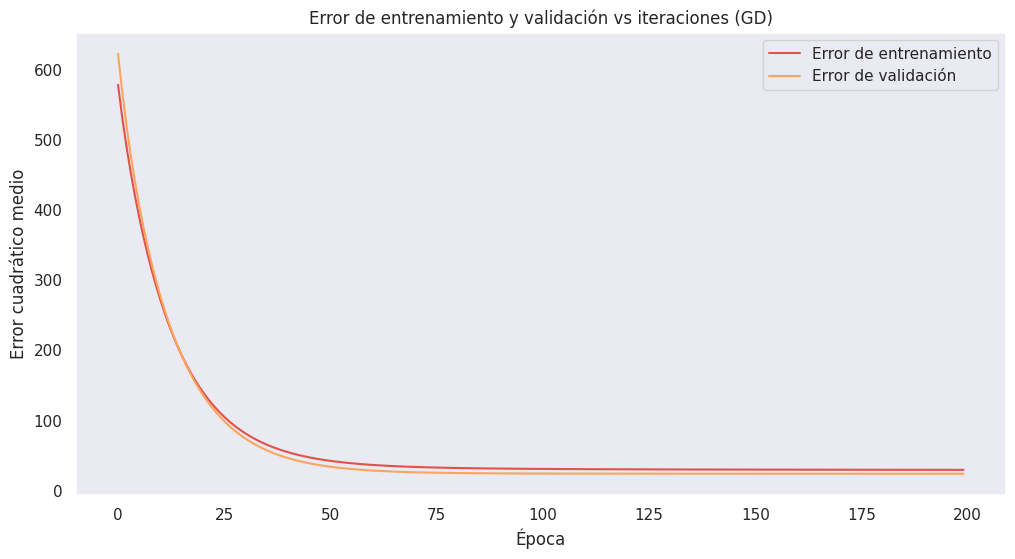

In [84]:
#Ahora utilizando nuestro lr optimizado:
W,train_errors,test_errors = gradient_descent(X_train_grad, y_train_grad,X_val_grad,y_val_grad,True, lr=lr_optimo, epochs=200)

Se puede observar en el gráfico que el error de entrenamiento y de validación se mueven a la par. El algoritmo converge en algun punto entre las 50 y 100 épocas.

In [85]:
# train_errors devuelve una lista con los 200 MSE (con datos de entrenamiento) de cada época. Nos quedamos con el último, ya que ese es el correspondiente al W que nos devuelve el modelo.
rmse_grad_desc_train = np.sqrt(train_errors[199])

In [86]:
#Utilizando los datos de test calculamos el RMSE para nuestro modelo
o = X_test_scaled.shape[0]
X_test = np.hstack((np.ones((o, 1)), X_test_scaled))
y_predict_grad = np.matmul(X_test, W)
error_test = y_test - y_predict_grad
test_mse = np.mean(error_test ** 2)
rmse_grad_desc_test =np.sqrt(test_mse)
round(rmse_grad_desc_test,2)

5.86

In [87]:
#Calculamos el R2 del modelo
R2 = metrics.r2_score(y_test, y_predict_grad)
round(R2,2)

0.64

##Gradiente descendiente minibatch

In [23]:
def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, graph=False, lr=0.01, epochs=200, batch_size=11):
    np.random.seed(43)  # Esto hace que los resultados sean reproducibles
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    val_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        train_mse_epoch = []  # Lista para almacenar el MSE de cada mini-batch en una época
        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j + batch_size, :]
            y_batch = y_train[j:j + batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse_batch = np.mean(error ** 2)
            train_mse_epoch.append(train_mse_batch)  # Guardar el MSE de cada mini-batch

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size
            W = W - (lr * gradient)

        # Al final de cada época, calcular el error promedio de todos los mini-batches. Esto nos permite una mejor visualizacion
        train_errors.append(np.mean(train_mse_epoch))

        # Calcular error de validación usando todos los datos de validación.
        prediction_val = np.matmul(X_val, W)
        error_val = y_val - prediction_val
        val_mse = np.mean(error_val ** 2)
        val_errors.append(val_mse)

    if graph:
        plt.figure(figsize=(12, 6))
        plt.plot(train_errors, label='Error de entrenamiento')
        plt.plot(val_errors, label='Error de validación')
        plt.xlabel('Época')
        plt.ylabel('Error cuadrático medio')
        plt.legend()
        plt.title('Error de entrenamiento y validación vs iteraciones (Mini-Batch GD)')
        plt.show()

    return W


In [24]:
#Calculamos el batch size usando la raiz cuadrada de los datos de entrenamiento.
batch_size = int(np.sqrt(len(X_train_grad)))

In [68]:
#Para conseguir el mejor modelo hacemos el mismo proceso que antes: diferentes valores de lr y con nuestros datos de validación elegimos el mejor
mini_batch_val_mse = [] # Para almacenar el MSE calculado con nuestros datos de validación para cada modelo
for lr in learning_rates:
  W = mini_batch_gradient_descent(X_train_grad, y_train_grad,X_val_grad,y_val_grad, False, lr, epochs=200, batch_size = batch_size)
  #Se calcula el MSE de validación para el W conseguido
  o = X_val_grad.shape[0]
  X_val = np.hstack((np.ones((o, 1)), X_val_grad)) #Se añade la columna de unos para la ordenada al origen.
  y_predict_mini_batch = np.matmul(X_val, W)
  error_val_mini_batch = y_val_grad - y_predict_mini_batch
  val_mse_mini_batch = np.mean(error_val_mini_batch ** 2)
  mini_batch_val_mse.append(val_mse_mini_batch)
# Se aplica la raíz cuadrada para pasar de mse a rmse
vals_rmse = np.sqrt(mini_batch_val_mse)
# Se identifica el mejor
rmse_min_mini_batch  = np.nanmin(vals_rmse)
lr_optimo_mini_batch = learning_rates[np.nanargmin(vals_rmse)]
print(f'El mejor valor de RMSE es: {round(rmse_min_mini_batch,2)}, se consiguió con un lr de: {lr_optimo_mini_batch}')

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-23-87db2be08b70>:28: RuntimeWarning: overflow encountered in square
  train_mse_batch = np.mean(error ** 2)
<ipython-input-23-87db2be08b70>:40: RuntimeWarning: overflow encountered in square
  val_mse = np.mean(error_val ** 2)
<ipython-input-68-e432d967e74b>:10: RuntimeWarning: overflow encountered in square
  val_mse_mini_batch = np.mean(error_val_mini_batch ** 2)
<ipython-input-23-87db2be08b70>:31: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * np.matmul(x_batch.T, error) / batch_size
<ipython-input-23-87db2be08b70>:26: RuntimeWarning: invalid value encountered in matmul
  prediction = np.matmul(x_batch, W)
<ipython-input-23-87db2be08b70>:31: RuntimeWarning: invalid value encountered in matmul
  gradient = -2 * np.matmul(x_batch.T, error) / batch_size
<ipython-input-23-87db2b

El mejor valor de RMSE es: 5.02, se consiguió con un lr de: 0.01


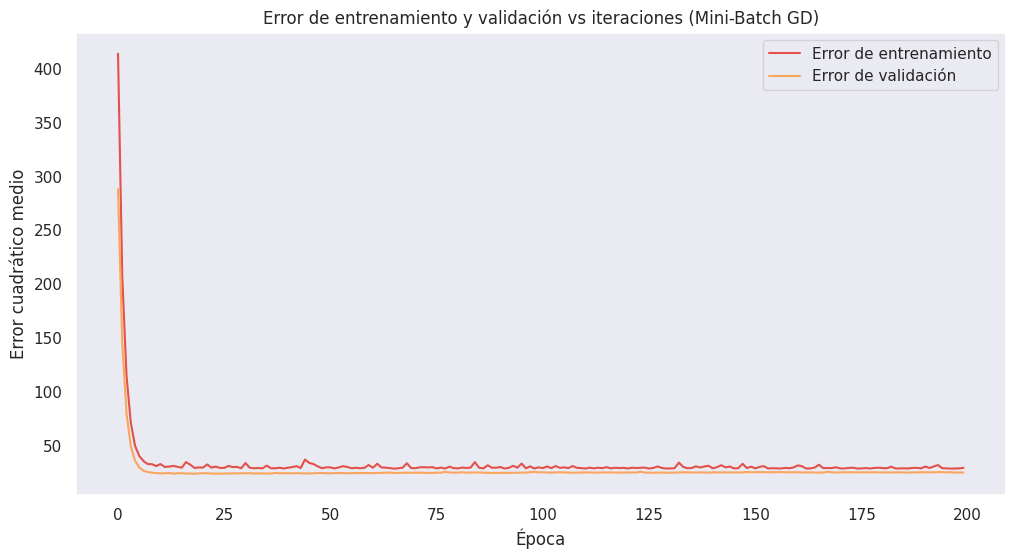

In [29]:
#Utilizamos nuestro lr optimizado
W_mini_batch = mini_batch_gradient_descent(X_train_grad, y_train_grad,X_val_grad,y_val_grad,True, lr = lr_optimo_mini_batch, epochs=200, batch_size = batch_size)

En el gráfico de mini batch podemos ver que el error de entrenamiento tiene cierto ruido, pero la convergencia sucede mucho antes que en el GD.

In [74]:
#Se calcula el RMSE del modelo mini batch con los datos de training
o = X_train_grad.shape[0]
X_train = np.hstack((np.ones((o, 1)), X_train_grad))
y__train_predict_mini_batch = np.matmul(X_train, W_mini_batch)
error_train_mini_batch = y_train_grad - y__train_predict_mini_batch
train_mse_mini_batch = np.mean(error_train_mini_batch ** 2)
rmse_mini_batch_train = np.sqrt(train_mse_mini_batch)
print(f"El error (rmse) de train es: {round(rmse_mini_batch_train,2)}")

El error (rmse) de train es: 5.41


In [89]:
#Se calcula el RMSE del modelo mini batch con los datos de test
o = X_test_scaled.shape[0]
X_test = np.hstack((np.ones((o, 1)), X_test_scaled))
y_predict_mini_batch = np.matmul(X_test, W_mini_batch)
error_test_mini_batch = y_test - y_predict_mini_batch
test_mse_mini_batch = np.mean(error_test_mini_batch ** 2)
rmse_mini_batch_test = np.sqrt(test_mse_mini_batch)
print(f"El error (rmse) de test es: {round(rmse_mini_batch_test,2)}")

El error (rmse) de test es: 5.83


#Regularizaciones

## Regresión Ridge

In [32]:
RidgeModel = RidgeCV(
                           alphas          = np.logspace(-3, 6, 200),
                           fit_intercept   = True,
                           store_cv_values = True
)
RidgeModel.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.10975250e-03, 1.23155060e-03, 1.36671636e-03,
       1.51671689e-03, 1.68318035e-03, 1.86791360e-03, 2.07292178e-03,
       2.30043012e-03, 2.55290807e-03, 2.83309610e-03, 3.14403547e-03,
       3.48910121e-03, 3.87203878e-03, 4.29700470e-03, 4.76861170e-03,
       5.29197874e-03, 5.87278661e-03, 6.51733960e-03, 7.23263390e-03,
       8.02643352e-03, 8.90735464e-0...
       9.11588830e+04, 1.01163798e+05, 1.12266777e+05, 1.24588336e+05,
       1.38262217e+05, 1.53436841e+05, 1.70276917e+05, 1.88965234e+05,
       2.09704640e+05, 2.32720248e+05, 2.58261876e+05, 2.86606762e+05,
       3.18062569e+05, 3.52970730e+05, 3.91710149e+05, 4.34701316e+05,
       4.82410870e+05, 5.35356668e+05, 5.94113398e+05, 6.59318827e+05,
       7.31680714e+05, 8.11984499e+05, 9.01101825e+05, 1.00000000e+06]),
        store_cv_values=True)

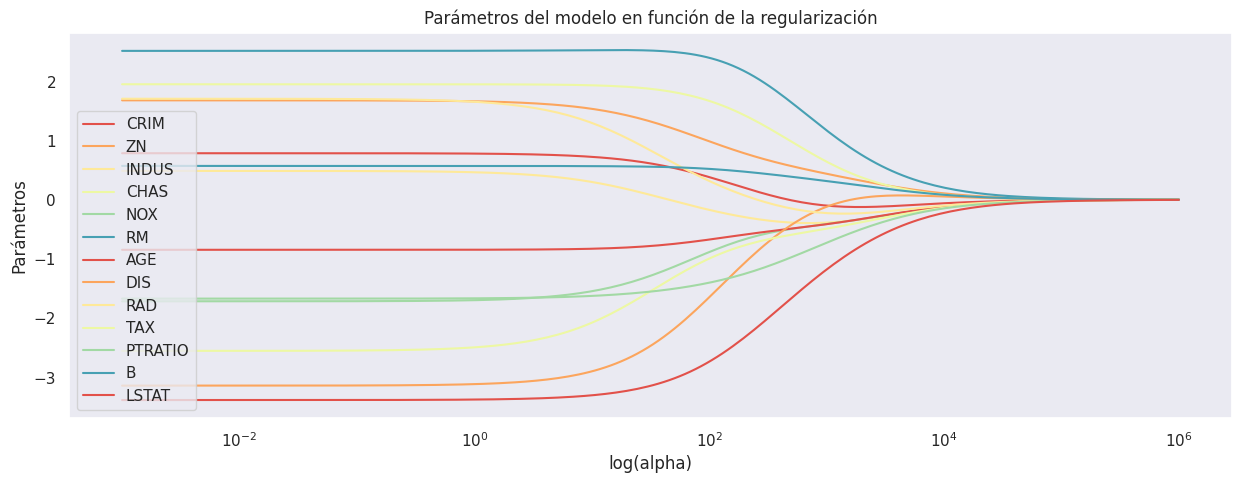

In [34]:
alphas = RidgeModel.alphas
coefs = []

for alpha in alphas:
    modelo_aux = Ridge(alpha=alpha)
    modelo_aux.fit(X_train_scaled, y_train)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train_scaled.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

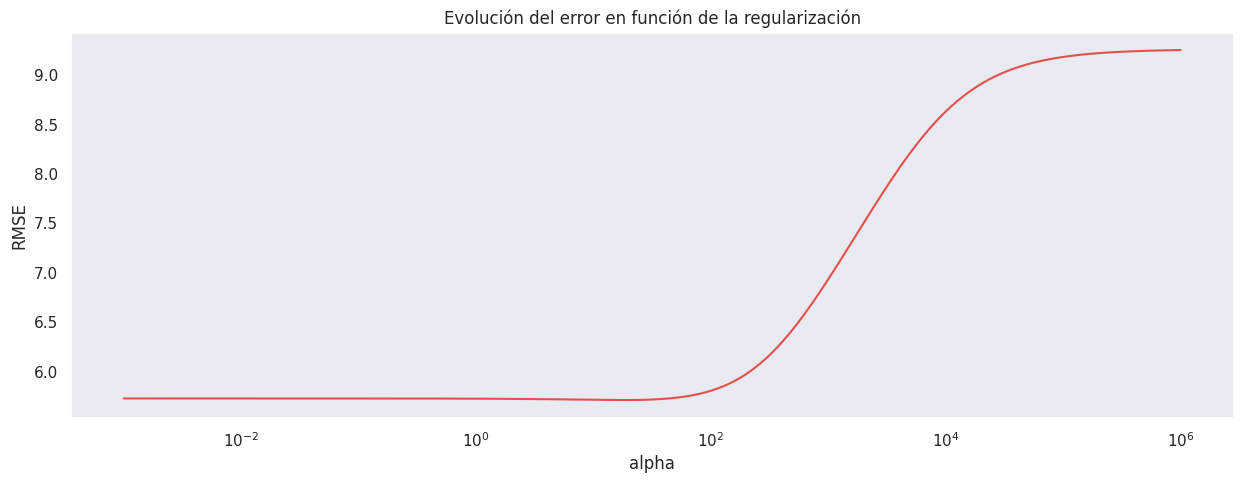

In [35]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mse_cv = RidgeModel.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
rmse_ridge_train     = np.min(rmse_cv)
optimo       = RidgeModel.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(RidgeModel.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [36]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {RidgeModel.alpha_}")

Mejor valor de alpha encontrado: 17.834308769319094


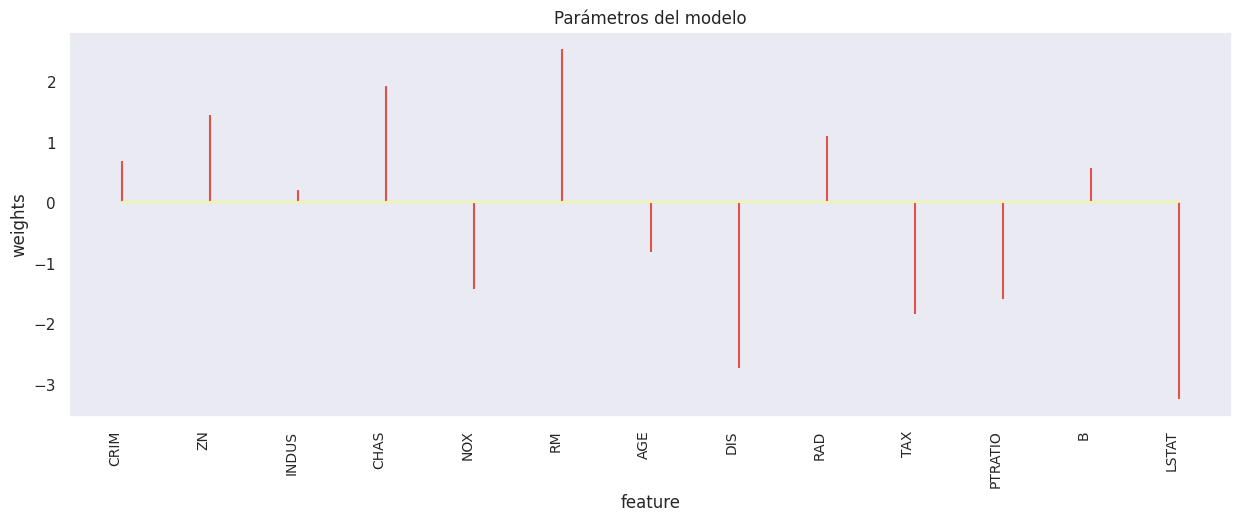

In [37]:
# Coeficientes del modelo

Ridge_coef = pd.DataFrame({'predictor': X_train_scaled.columns,'coef': RidgeModel.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(Ridge_coef.predictor, Ridge_coef.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [38]:
# Predicciones test
y_predict_ridge = RidgeModel.predict(X_test_scaled)

In [60]:
# Error de test del modelo

rmse_ridge_test = mean_squared_error(y_test,
                y_predict_ridge,
                squared = False
             )
r2_ridge_test = round(r2_score(y_test, y_predict_ridge),2)

print(f"El error (rmse) de test es: {round(rmse_ridge_test,2)}. R2: {r2_ridge_test}")

El error (rmse) de test es: 5.88. R2: 0.64


##Regresión Lasso

In [41]:
LassoModel = LassoCV(
                 alphas=np.logspace(-10, 1, 200),
                 cv=100
                )
LassoModel.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-10, 1.13573336e-10, 1.28989026e-10, 1.46497140e-10,
       1.66381689e-10, 1.88965234e-10, 2.14614120e-10, 2.43744415e-10,
       2.76828663e-10, 3.14403547e-10, 3.57078596e-10, 4.05546074e-10,
       4.60592204e-10, 5.23109931e-10, 5.94113398e-10, 6.74754405e-10,
       7.66341087e-10, 8.70359136e-10, 9.88495905e-10, 1.12266777e-09,
       1.27505124e-09, 1.44811823e-0...
       5.35356668e-01, 6.08022426e-01, 6.90551352e-01, 7.84282206e-01,
       8.90735464e-01, 1.01163798e+00, 1.14895100e+00, 1.30490198e+00,
       1.48202071e+00, 1.68318035e+00, 1.91164408e+00, 2.17111795e+00,
       2.46581108e+00, 2.80050389e+00, 3.18062569e+00, 3.61234270e+00,
       4.10265811e+00, 4.65952567e+00, 5.29197874e+00, 6.01027678e+00,
       6.82607183e+00, 7.75259749e+00, 8.80488358e+00, 1.00000000e+01]),
        cv=100)

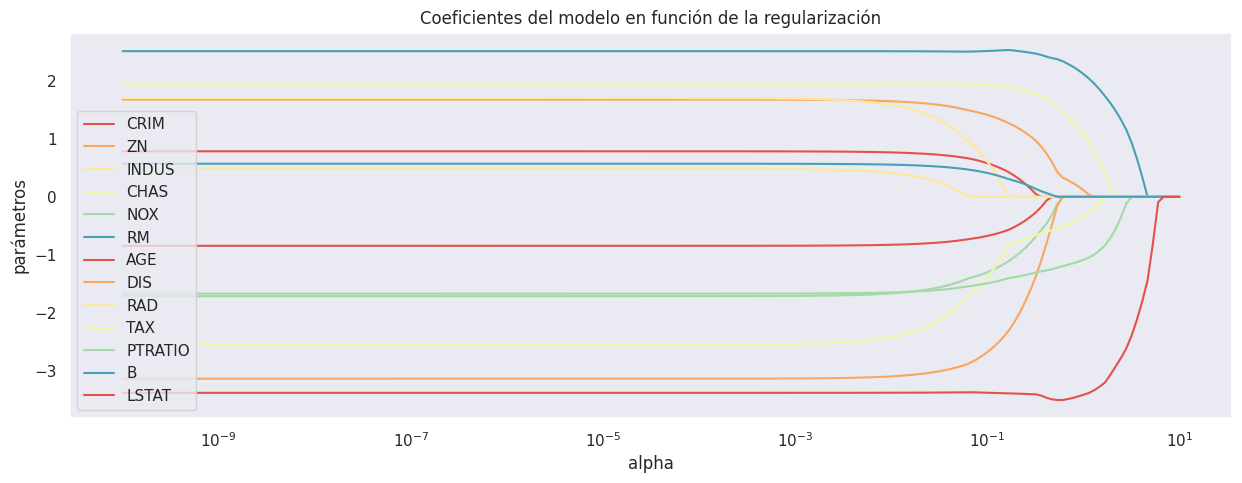

In [42]:
# Evolución de los parámetros en función de alpha

alphas = LassoModel.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = Lasso(alpha=alpha)
    modelo_aux.fit(X_train_scaled, y_train)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train_scaled.columns)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

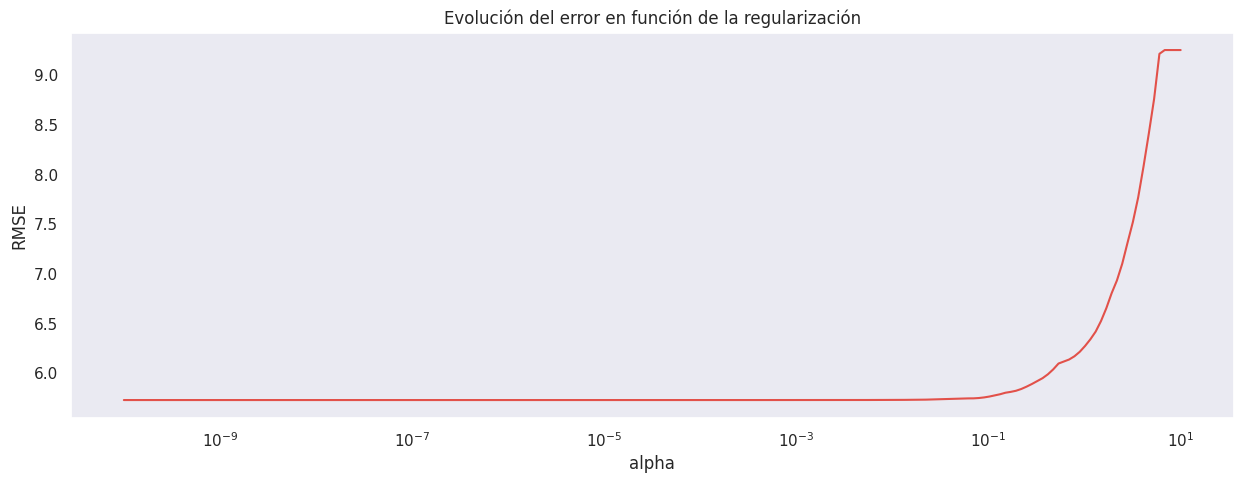

In [43]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = LassoModel.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
rmse_lasso_train     = np.min(rmse_cv)
optimo              = LassoModel.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(LassoModel.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [44]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {LassoModel.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [46]:
Lasso_coef = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': LassoModel.coef_.flatten()}
                  )

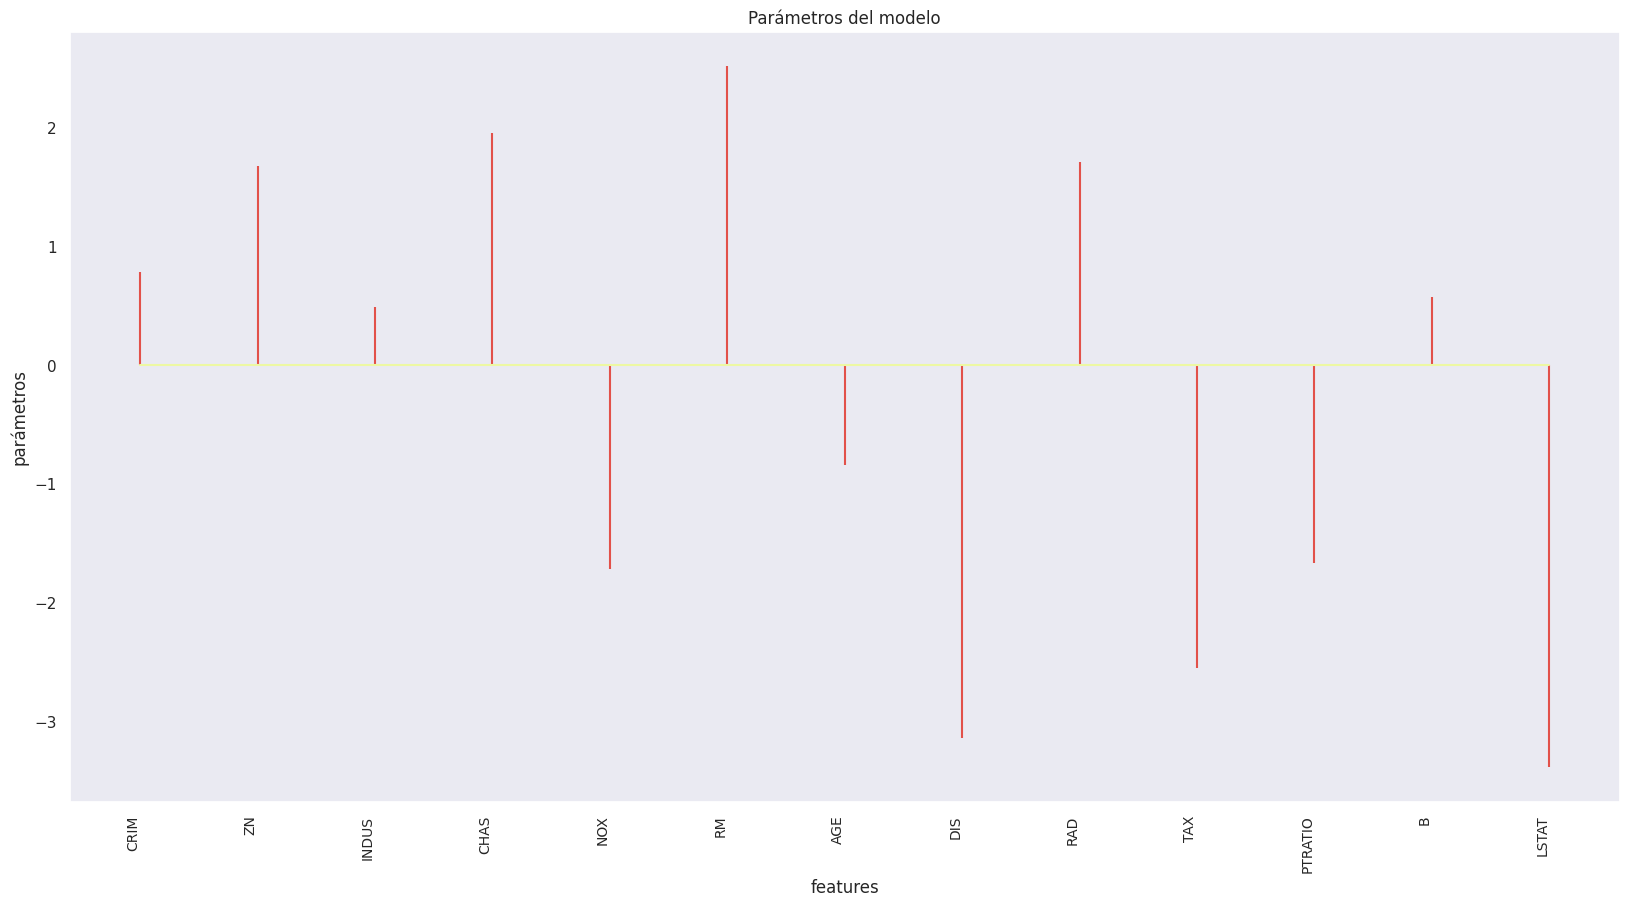

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(Lasso_coef.predictor, Lasso_coef.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [50]:
y_predict_lasso = LassoModel.predict(X_test_scaled)

In [67]:
# Error de test del modelo

rmse_lasso_test = mean_squared_error(y_test,y_predict_lasso,squared = False)
r2_lasso_test = r2_score(y_test, y_predict_lasso)
print(f"El error (rmse) de test es: {round(rmse_lasso_test,2)}, y R2: {round(r2_lasso_test,2)}")

El error (rmse) de test es: 5.89, y R2: 0.64


##ElasticNet

In [52]:
ElasticNetModel = ElasticNetCV(
                      l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                      alphas          = np.logspace(-3, 6, 200),
                      cv              = 10,
                      max_iter = 1000
                      )
ElasticNetModel.fit(X_train_scaled, y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6476.03291927382, tolerance: 3.188819494369184
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6375.778144245311, tolerance: 3.188819494369184
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linea

ElasticNetCV(alphas=array([1.00000000e-03, 1.10975250e-03, 1.23155060e-03, 1.36671636e-03,
       1.51671689e-03, 1.68318035e-03, 1.86791360e-03, 2.07292178e-03,
       2.30043012e-03, 2.55290807e-03, 2.83309610e-03, 3.14403547e-03,
       3.48910121e-03, 3.87203878e-03, 4.29700470e-03, 4.76861170e-03,
       5.29197874e-03, 5.87278661e-03, 6.51733960e-03, 7.23263390e-03,
       8.02643352e-03, 8.907354...
       9.11588830e+04, 1.01163798e+05, 1.12266777e+05, 1.24588336e+05,
       1.38262217e+05, 1.53436841e+05, 1.70276917e+05, 1.88965234e+05,
       2.09704640e+05, 2.32720248e+05, 2.58261876e+05, 2.86606762e+05,
       3.18062569e+05, 3.52970730e+05, 3.91710149e+05, 4.34701316e+05,
       4.82410870e+05, 5.35356668e+05, 5.94113398e+05, 6.59318827e+05,
       7.31680714e+05, 8.11984499e+05, 9.01101825e+05, 1.00000000e+06]),
             cv=10, l1_ratio=[0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99])

In [53]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = ElasticNetModel.mse_path_.mean(axis = 2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha). Se convierte en un dataframe:
ElasticNet_results = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [ElasticNetModel.l1_ratio, ElasticNetModel.alphas_],
                                    names     = ['l1_ratio', 'ElasticNetModel.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

ElasticNet_results['rmse_cv'] = np.sqrt(ElasticNet_results['mse_cv'])
rmse_elastic_train = ElasticNet_results['rmse_cv'].min()
ElasticNet_results = ElasticNet_results.reset_index().sort_values('mse_cv', ascending = True)
ElasticNet_results

,l1_ratio,ElasticNetModel.alphas_,mse_cv,rmse_cv
166,0.0,0.031079,31.939699,5.651522
167,0.0,0.028005,31.939930,5.651542
165,0.0,0.034490,31.941301,5.651664
168,0.0,0.025235,31.941617,5.651692
169,0.0,0.022740,31.944439,5.651941
...,...,...,...,...
602,0.7,811984.499318,85.756574,9.260485
601,0.7,901101.825167,85.756574,9.260485
600,0.7,1000000.000000,85.756574,9.260485
507,0.5,14.481182,85.756574,9.260485


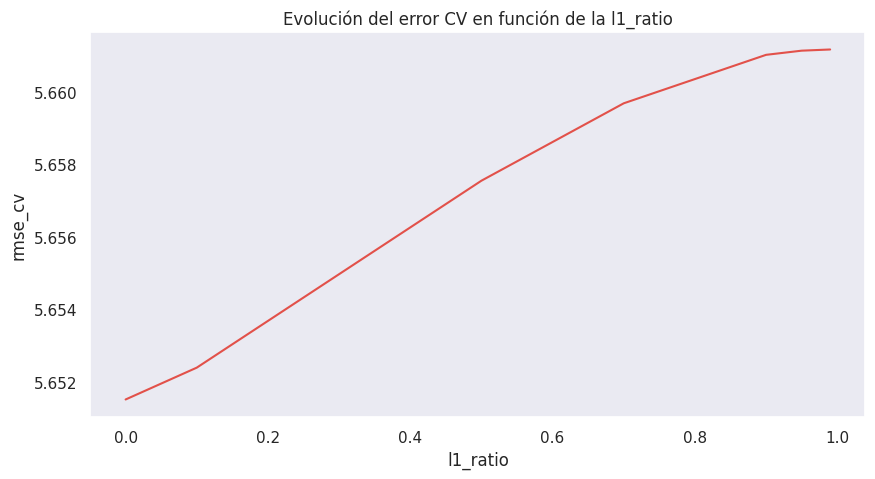

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ElasticNet_results.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {ElasticNetModel.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {ElasticNetModel.l1_ratio_}")

Mejor valor de alpha encontrado: 0.03107866187782014
Mejor valor de l1_ratio encontrado: 0.0


In [ ]:
# Parámetros del modelo
ElasticNet_coef = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': ElasticNetModel.coef_.flatten()}
                  )

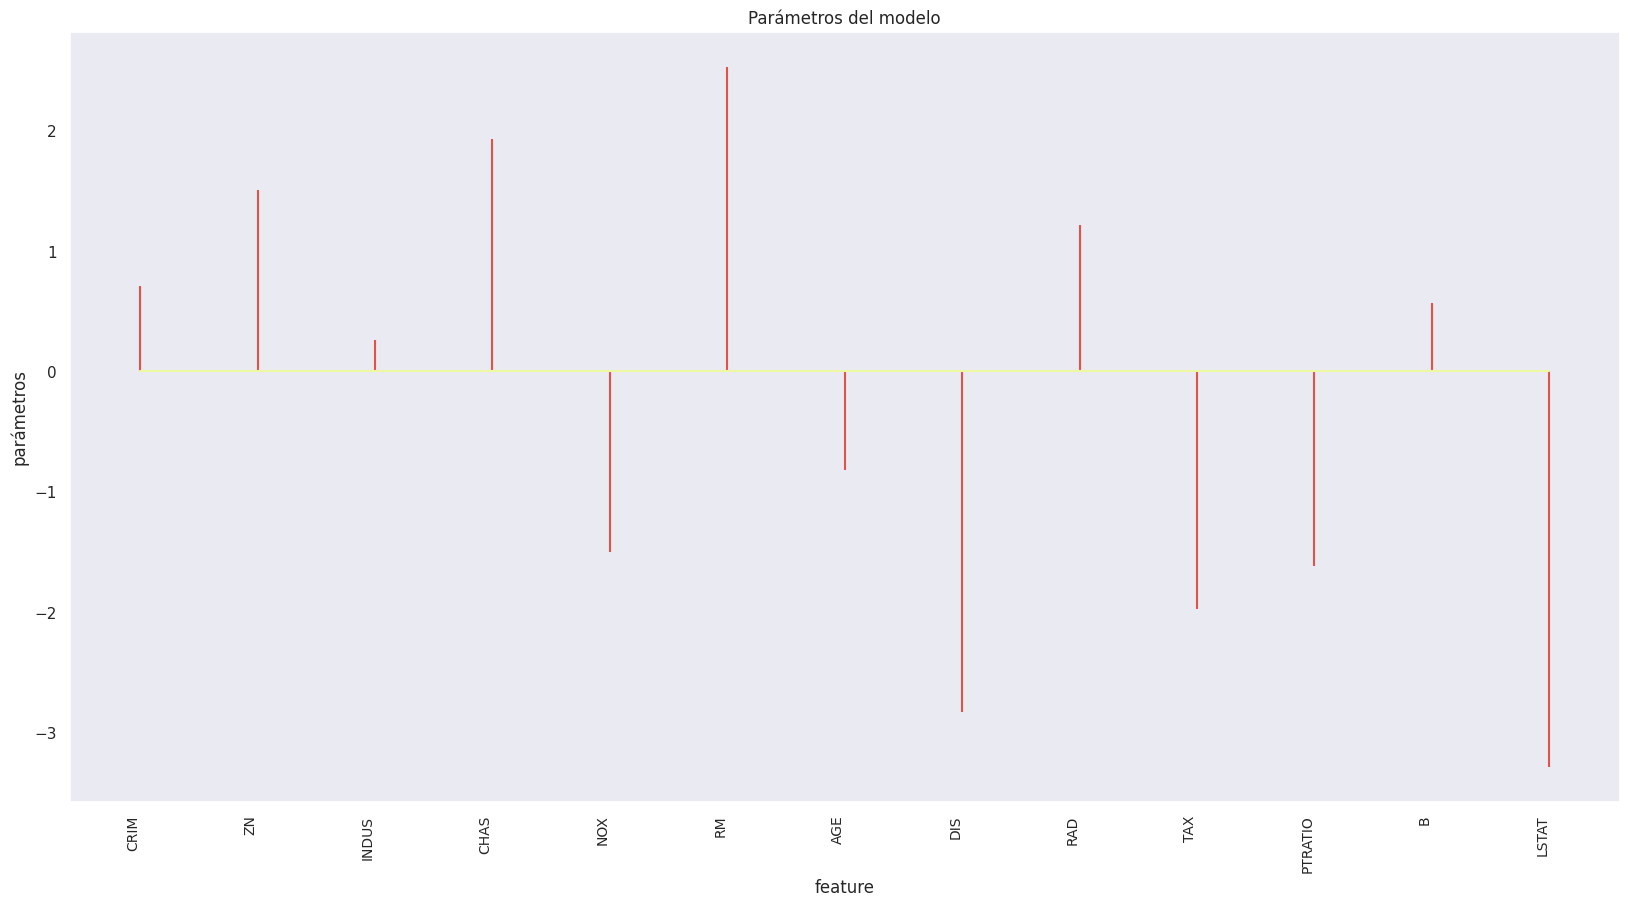

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(ElasticNet_coef.predictor, ElasticNet_coef.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [54]:
# Predicciones test
y_predict_ElasticNet = ElasticNetModel.predict(X_test_scaled)

In [72]:
# Error de test del modelo

rmse_elastic_test = mean_squared_error(y_test,y_predict_ElasticNet, squared = False)
r2_elastic_test = r2_score(y_test, y_predict_ElasticNet)
print(f"El error (rmse) de test es: {round(rmse_elastic_test,2)} y R2: {round(r2_elastic_test,2)}")

El error (rmse) de test es: 5.88 y R2: 0.64


#Comparación

In [90]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Linear Regression','Grad Desc','Mini batch Grad', 'Ridge', 'Lasso', 'Elastic Net'],
                    'train rmse': [rmse_linear_train,rmse_grad_desc_train, rmse_mini_batch_train, rmse_ridge_train, rmse_lasso_train, rmse_elastic_train],
                    'test rmse': [rmse_linear_test,rmse_grad_desc_test, rmse_mini_batch_test, rmse_ridge_test, rmse_lasso_test, rmse_elastic_test]
                 })
df_comparacion.sort_values('test rmse', ascending = True).reset_index(drop = True)

,modelo,train rmse,test rmse
0,Mini batch Grad,5.410583,5.831000
1,Grad Desc,5.451520,5.857804
2,Ridge,5.709778,5.878790
3,Elastic Net,5.651522,5.882397
4,Lasso,5.726563,5.892764
5,Linear Regression,5.349359,5.892764


Para la comparación entre los modelos, utilizamos el Root Mean Squared Error(RMSE) que mide la magnitud promedio de los errores que comete el modelo al hacer predicciones.
 Utilizamos la métrica tanto para los datos de training como para los de test,
 con el objetivo de observar si habia sobreajuste en alguno de los modelos.

Según los datos obtenidos, el mejor modelo que conseguimos fue el de gradiente descendiente mini batch. La mejora que obtuvimos al respecto de nuestra regresion lineal original es de 0.061764.

#Conclusión

En este trabajo entrenamos diferentes modelos de regresión lineal y observamos que el modelo inicial mostraba un leve sobreajuste, ya que las predicciones en los datos de test eran significativamente peores que en los de entrenamiento. Para encontrar un modelo mejor, intentamos dos tipos de algoritmos diferentes: los de gradiente descendiente y los de regularización. Los primeros fueron los que mejor pudieron predecir los datos de test, teniendo el menor RMSE de todos los modelos, mientras que los de regularización, a pesar de haber mejorado su rendimiento en comparación a la regresión lineal simple, no fueron muy superiores a la misma. Esto puede ser debido a que no había grandes outliers en el dataset y por eso la regularización no era demasiado necesaria.